# LSTM Recurrent Neural Network
**Author**: Adi Bronshtein, DC

**Background:** we're going to use a _Recurrent Neural Network_ for text classification. The key feature of RNNs is that the data loop back in the network. This gives RNNs a type of "memory" it can use to better understand sequential data. A popular choice type of RNN is the _Long Short-Term Memory_ (LSTM) network which allows for information to loop backwards in the network.

In [1]:
# the regular imports 
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb # check out the dataset info at https://keras.io/datasets/
from keras.models import Sequential # import the type of model we'll use
from keras.layers import Dense, LSTM, Dropout # import the layers
from keras.layers.embeddings import Embedding # import another kind of layers
from keras.preprocessing import sequence

# set random seed for reproducibility
np.random.seed(42)

Using TensorFlow backend.


## Simple LSTM for Sequence Classification

### The IMDB Movie Review Dataset
Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words."
As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word. 

Check out the full description and how to use the dataset and the `"load_data()"` method in the [Keras Documentation](https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification)

#### Load Dataset On Movie Review Text

In [2]:
# load in the dataset using load_data, but only keep the top 5000 words. Other words would be 0. 
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# imdb.load_data returns two tuples: (x_train, x_test) and (y_train, y_test). See the (link to) documentation above!

In [5]:
# shorten/pad the input sequence - to make each observation have 500 features (you can change that value)
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

#### View First Observation’s Raw Data

#### View First Observation’s Feature Data


In [5]:
# View first observation
y

### Create LSTM Neural Network Architecture

In [8]:
# set the vector length
embedding_vector_length =32

# instantiate the neural network
model = Sequential()

# first layer - Embedded layer with a length of 32 vectors (represent each word)
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))

# second layer - LSTM (long short-term memory) layer with 100 neurons
model.add(LSTM(100))

# last layer - a fully densed (connected) layer with sigmoid activation function (binary classification)
model.add(Dense(1, activation='sigmoid'))

# compiling the network. Using binary crossentropy for log loss, adam as optimizer and accuracy as our metric
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# shows us all the model's informantion
print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


### Train LSTM Neural Network Architecture

In [9]:
'''fit the model and assign it to a history object (to get info from fitted model later)
fitting on the trainig data and using the test data as validation/evaluation.
when you have more time, try epochs=3 (or more!)''' 
# Train neural network
history = model.fit(X_train, y_train, validation_data=[X_test, y_test], epochs=1, batch_size=64)

/Users/adibronshtein/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/1
25000/25000 [==============================] - 377s 15ms/step - loss: 0.4801 - accuracy: 0.7577 - val_loss: 0.4069 - val_accuracy: 0.8276


### Evaluate the Model

In [10]:
# evaluation of the model using the accuracy score 
scores = model.evaluate(X_test, y_test, verbose=1)

25000/25000 [==============================] - 89s 4ms/step


In [11]:
scores

[0.40693396728515624, 0.8276399970054626]

### Visualize Neural Network Performance History 

For the sake of time, we're only running one epoch during the lesson, so this visualization would be meaningless.   
Try running this code later, when you have time, after using, say, 10 or 15 epochs and seeing the training and testing accurcy. 

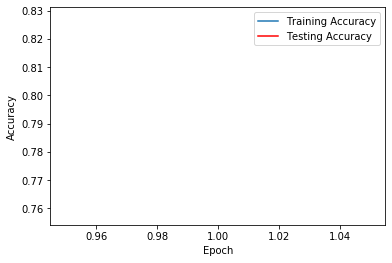

In [12]:
# Get training and test accuracy histories
training_accuracy = history.history['accuracy']
testing_accuracy = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize accuracy history
plt.plot(epoch_count, training_accuracy)
plt.plot(epoch_count, testing_accuracy, 'red')
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show();

## LSTM For Sequence Classification With Dropout

As we discussed earlier, RNNs like LSTM are pretty prone for overfitting. We can add a Dropout layer between the the Embedding and LSTM layers and the LSTM and Dense output layers. Each Dropout layer will drop a user-defined hyperparameter of units in the previous layer every batch. Remember in Keras the input layer is assumed to be the first layer and not added using the add. Therefore, if we want to add dropout to the input layer, the layer we add in our is a dropout layer. This layer contains both the proportion of the input layer’s units to drop 0.2 and input_shape defining the shape of the observation data. Next, after we add a dropout layer with 0.5 after each of the hidden layers.

### Create LSTM Neural Network Architecture (with Dropout)

In [13]:
# Start neural network
network = Sequential()
# Add a dropout layer for input layer
network.add(Dropout(0.2, input_shape=(max_review_length, )))

# Add fully connected layer with a ReLU activation function
network.add(Dense(units=16, activation='relu'))

# Add a dropout layer for previous hidden layer
network.add(Dropout(0.2))

# Add fully connected layer with a ReLU activation function
network.add(Dense(units=16, activation='relu'))

# Add a dropout layer for previous hidden layer
network.add(Dropout(0.2))

# Add fully connected layer with a sigmoid activation function
network.add(Dense(units=1, activation='sigmoid'))

### Compile the Network

In [15]:
# Compile neural network
network.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

### Train LSTM Neural Network Architecture

In [18]:
# Train neural network
history_dropout = network.fit(X_train, y_train, validation_data=[X_test, y_test],
                             epochs=10, batch_size=100, verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 2s 70us/step - loss: 0.7011 - accuracy: 0.4988 - val_loss: 0.6941 - val_accuracy: 0.5003
Epoch 2/10
25000/25000 [==============================] - 1s 56us/step - loss: 0.7044 - accuracy: 0.4990 - val_loss: 0.6941 - val_accuracy: 0.4998
Epoch 3/10
25000/25000 [==============================] - 1s 50us/step - loss: 0.7001 - accuracy: 0.4912 - val_loss: 0.6938 - val_accuracy: 0.4999
Epoch 4/10
25000/25000 [==============================] - 2s 69us/step - loss: 0.6976 - accuracy: 0.4989 - val_loss: 0.6935 - val_accuracy: 0.4998
Epoch 5/10
25000/25000 [==============================] - 1s 56us/step - loss: 0.7002 - accuracy: 0.5004 - val_loss: 0.6934 - val_accuracy: 0.5002
Epoch 6/10
25000/25000 [==============================] - 2s 83us/step - loss: 0.7039 - accuracy: 0.4998 - val_loss: 0.6932 - val_accuracy: 0.4997
Epoch 7/10
25000/25000 [==============================] - 1s 60us/st

### Evaluate the Model

In [19]:
# Get the accuracy score
scores_dropout = network.evaluate(X_test, y_test, verbose=1)
print(scores_dropout[1])

25000/25000 [==============================] - 1s 59us/step
0.49983999133110046


### Visualize Neural Network Performance History 

For the sake of time, we're only running one epoch during the lesson, so this visualization would be meaningless.   
Try running this code later, when you have time, after using, say, 10 or 15 epochs and seeing the training and testing accurcy. 

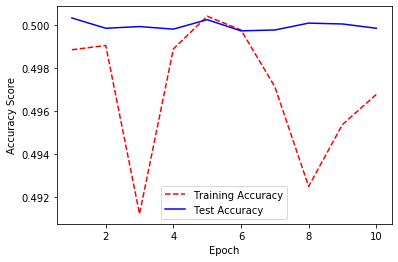

In [22]:
# Get training and test accuracy histories
training_accuracy = history_dropout.history['accuracy']
test_accuracy = history_dropout.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize accuracy history
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy Score')
plt.show();

## Visualizing the Network

In [23]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

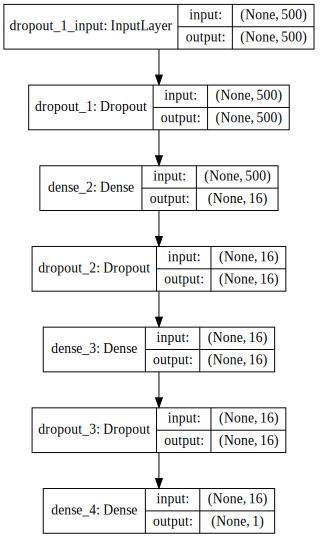

In [25]:
# Visualize network architecture
SVG(model_to_dot(network, dpi=70, show_shapes=True).create(prog='dot', format='svg'))